In [245]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline

# Loading the Dataset and Exploring

In [246]:
car_data = pd.read_csv('assets/Car_sale_ads.csv')

In [247]:
car_data

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [248]:
# Initial dataset info before imputation
car_ds_info = car_data.info()
car_ds_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

***
Stats of the attributes: -
- After showing some info related to the dataset we can tell that the number of entries is 208304
- Info can show also the count number of non null values for each attribute indicating that:-
    - Vehicle_version got 70,222 null values
    - Vehicle_generation got 60,444 null values
    - Mileage_km got 983 null values
    - Power_HP got 643 null values
    - Displacement_cm3 got 1,966 null values
    - CO2_emissions got 114,257 null values
    - Drive got 15,076 null values
    - Transmission got 479 null values
    - Doors_number got 1,487 null values
    - Origin_country got 89,992 null values
    - First_owner got 143,210 null values
    - First_registration_date got 121,859 null values
- It can show also each attribute's data type, also indicating that most data type used is object
***

In [249]:
# showing if there are some duplicated values in the dataset:-
car_ds_dup = car_data.duplicated().sum()
car_ds_dup

0

- There is no duplicated values in the dataset.

In [250]:
# showing the first five rows
car_data.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [251]:
# explaining the number of rows and columns in the dataset
car_data.shape

(208304, 25)

- 208304 -> rows
- 25 -> columns

In [252]:
# showing some basic statistical computations on the dataset like the extreme values, count of data points standard deviation.
car_data.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,208304.000000,2.083040e+05,208304.000000,2.073210e+05,207661.000000,206338.000000,9.404700e+04,206817.000000
mean,104151.500000,6.305383e+04,2012.098241,1.502768e+05,151.836281,1882.567147,3.191564e+05,4.637138
std,60132.329574,8.665967e+04,6.998414,2.937447e+06,77.683546,729.609660,7.291396e+07,0.768559
min,0.000000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,52075.750000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,104151.500000,3.570000e+04,2013.000000,1.445660e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,156227.250000,7.599000e+04,2017.000000,2.060000e+05,172.000000,1997.000000,1.640000e+02,5.000000
max,208303.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


# Cleaning The Data

- The beginning part can be considered also a part of the EDA (exploration data analysis) to indicate the count of the null values and other info:-

In [253]:
# this line of code to check the null values of each attribute so that the null values are = False
car_data.notnull()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,False,False,False,True,True,True
1,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,False,False,False,True,True,True
2,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,False,False,False,True,True,True
3,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,False,False,False,True,True,True
4,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,False,False,False,True,True,True
208300,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,True,False,False,True,True,True
208301,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,False,False,True,True,True,True
208302,True,True,True,True,True,True,False,False,True,True,...,True,True,True,True,False,False,False,True,True,True


- Its showing the values thats null or not null 
    - not-null = true 
    - null - false
as the function is called nonull() so it only gives true value to the notnull values.
***        

In [254]:
# to check how many values are null in each attributes.
null_values_of_car_data = car_data.isnull().sum()
null_values_of_car_data

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

- This stat shows the attributes that has null values and how many values are null in each one.
***

### Handling missing values: -

In [255]:
# to see the percentage of null values from the entire data. 
data_nu_car_count = np.product(car_data.shape)
(null_values_of_car_data.sum()/data_nu_car_count)*100

11.917543590137491

- About 12% of the data are null values

Handling the first column got null values which is the vehicle_version

In [256]:
# looking at the null values of vehicle versions to look if there is a relation with other attributes
vehicle_version_null = car_data[car_data['Vehicle_version'].isnull()]
vehicle_version_null.head(20)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,62950,PLN,Used,Abarth,595,NaN,NaN,2016,46060.0,...,Manual,small_cars,3.0,gray,Germany,Yes,15/03/2016,30/04/2021,"Modlińska 157 - 03-186 Warszawa, Białołęka (Po...","['ABS', 'Electric front windows', 'Drivers air..."
6,6,69900,PLN,Used,Abarth,595,NaN,NaN,2021,2900.0,...,Manual,small_cars,2.0,black,Germany,NaN,25/02/2021,29/04/2021,"Żary, żarski, Lubuskie",[]
7,7,69900,PLN,Used,Abarth,500,NaN,NaN,2019,20000.0,...,Manual,small_cars,3.0,white,Poland,Yes,NaN,29/04/2021,"Ojcowska 2 - 02-918 Warszawa, Mokotów (Polska)","['ABS', 'Electrically adjustable mirrors', 'Pa..."
8,8,120750,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
9,9,93100,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [257]:
car_data.mode(dropna=True)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,19900.0,PLN,Used,Volkswagen,Astra,2.0 TDI,II (2012-),2021.0,1.0,...,Manual,SUV,5.0,black,Poland,Yes,01/01/2017,03/05/2021,"Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)",[]
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208300,208300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208301,208301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208302,208302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# droping the column of vehicle_version
car_data_new = car_data.drop(['Vehicle_version'], axis=1)
car_data_new

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_generation,Production_year,Mileage_km,Power_HP,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,2021,1.0,145.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,1974,59000.0,75.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,2018,52000.0,180.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,2012,29000.0,160.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,2021,600.0,165.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,2014,40000.0,173.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,1970,63518.0,70.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,1977,11880.0,60.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,1986,100000.0,36.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


- So for this column droping the rows could be risky for losing important data but if i used like putting the most frequently used vehicle version it won't be logicaly correct because you can't put a type of engine in a car cant handle it so removing the column i think it is the most suitable way to deal with this attribute and there is no relation between this attribute and other attribute to make a result for the null valuess plus it's wont affect the dataset that much as for the other important values.
- Like i can't use the 2.0 TDI on another cars that can't take this engine for example cant put this engine on a car that uses gasoline because this engine is used for cars using diesel
So its not a suitable way for cleaning this attribute. 
- droping the column

Handling missing values of Vehicle_generation

In [259]:
vehicle_generation_null = car_data_new[car_data_new['Vehicle_generation'].isnull()]
vehicle_generation_null.head(30)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_generation,Production_year,Mileage_km,Power_HP,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,2021,1.0,145.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,1974,59000.0,75.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,2018,52000.0,180.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,2012,29000.0,160.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,2021,600.0,165.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,62950,PLN,Used,Abarth,595,NaN,2016,46060.0,180.0,...,Manual,small_cars,3.0,gray,Germany,Yes,15/03/2016,30/04/2021,"Modlińska 157 - 03-186 Warszawa, Białołęka (Po...","['ABS', 'Electric front windows', 'Drivers air..."
6,6,69900,PLN,Used,Abarth,595,NaN,2021,2900.0,145.0,...,Manual,small_cars,2.0,black,Germany,NaN,25/02/2021,29/04/2021,"Żary, żarski, Lubuskie",[]
7,7,69900,PLN,Used,Abarth,500,NaN,2019,20000.0,145.0,...,Manual,small_cars,3.0,white,Poland,Yes,NaN,29/04/2021,"Ojcowska 2 - 02-918 Warszawa, Mokotów (Polska)","['ABS', 'Electrically adjustable mirrors', 'Pa..."
8,8,120750,PLN,New,Abarth,595,NaN,2021,1.0,180.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
9,9,93100,PLN,New,Abarth,595,NaN,2021,1.0,145.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [260]:
print(car_data_new.Vehicle_generation.unique())


[nan 'C4 (1991-1994)' 'C1 (1968-1976)' 'C3 (1982-1991)' 'C2 (1976-1982)'
 'B4 (1991-1995)' 'B2 (1978-1986)' 'B3 (1986-1991)' '8P (2003-2012)'
 '8L (1996-2003)' '8V (2012-)' '8Y (2020 - )' 'B7 (2004-2007)'
 'B5 (1995-2001)' 'B6 (2000-2004)' 'B8 (2007-2015)' 'B9 (2015-)'
 'F5 (2016-)' '8T (2007-2016)' 'C7 (2012-)' 'C5 (1999-2005)'
 'C6 (2006-2011)' 'C8 (2019-)' 'C6 (2004-2011)' 'C7 (2011-2018)'
 'C8 (2018-)' 'C5 (1997-2004)' 'C4 (1994-1997)' 'D2 (1994-2002)'
 'D4 (2010-)' 'D3 (2002-2010)' 'D5 (2017-)' 'FY (2017-)' '8R (2008-2016)'
 'I (2005-2015)' 'II (2015-)' '8J (2006-2013)' '8N (1998-2006)'
 '8S (2014-)' 'E81/E82/E87/E88 (2004-2013)' 'F20/F21 (2011-)'
 'F40 (2019-)' '114' 'G20 (2019-)' 'E36 (1990-1999)' 'F30/F31 (2012-)'
 'E46 (1998-2007)' 'E90/E91/E92/E93 (2005-2012)' 'E21 (1975-1982)'
 'E30 (1982-1994)' 'G30/G31 (2017-)' 'F10/F11 (2009-2017)'
 'E60/E61 (2003-2010)' 'E39 (1996-2003)' 'E28 (1981-1987)'
 'E34 (1988-1996)' 'E12 (1972-1981)' 'F12/F13/F14 (2011-)'
 'E63/E64 (2002-2010)' '

In [261]:
car_data_new = car_data_new.drop(['Vehicle_generation'], axis=1)

- checking the unique values of the vehicle_generation attribute to check if we can make a relationship with the year of production to fill the null values of the vehicle_generation but we can see that there are many vehivle generation types related with a specific range of years so it wont be a good approach.
- droping the column is the best solution as it doesn't have a relation with any other attribute as the vehicle_version.
- having the production year is enough for this dataset.

In [262]:
car_data_new

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,1970,63518.0,70.0,2120.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,1977,11880.0,60.0,2120.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [263]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

Handling the Mileage_km missing vales

- the best approach to handle the missing values of the Mileage_km attribute by filling the null values with the mean value of all the values of this attribute as ther is no relation with other attributes

In [264]:
mileage_null = car_data_new[car_data_new['Mileage_km'].isnull()]
mileage_null.head(15)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
27,27,86990,PLN,New,Abarth,595,2021,NaN,145.0,1368.0,...,Manual,compact,3.0,white,NaN,NaN,NaN,03/05/2021,"ul. Krasnobrodzka 5, 03-214 - 03-214 Warszawa,...","['Airbag protecting the knees', 'Front side ai..."
28,28,119990,PLN,New,Abarth,595,2020,NaN,180.0,1368.0,...,Manual,compact,3.0,red,NaN,NaN,NaN,02/05/2021,"ul. Krasnobrodzka 5, 03-214 - 03-214 Warszawa,...","['Airbag protecting the knees', 'Tinted window..."
29,29,98900,PLN,New,Abarth,595,2021,NaN,165.0,1368.0,...,Manual,compact,3.0,white,NaN,NaN,NaN,30/04/2021,"ul. Krasnobrodzka 5, 03-214 - 03-214 Warszawa,...","['Airbag protecting the knees', 'Front side ai..."
1690,1690,91000,PLN,New,Audi,A1,2021,NaN,116.0,999.0,...,Automatic,city_cars,5.0,black,Poland,NaN,NaN,30/04/2021,"Opolska 2C - 45-960 Opole, Opolskie (Polska)","['ABS', 'Electric front windows', 'Velor uphol..."
1691,1691,84999,PLN,New,Audi,A1,2021,NaN,116.0,999.0,...,Manual,city_cars,5.0,white,Poland,NaN,NaN,30/04/2021,"Opolska 2C - 45-960 Opole, Opolskie (Polska)","['ABS', 'Electric front windows', 'Velor uphol..."
1770,1770,101352,PLN,New,Audi,A1,2021,NaN,116.0,999.0,...,Automatic,city_cars,5.0,green,Poland,NaN,NaN,02/05/2021,"Opolska 2C - 45-960 Opole, Opolskie (Polska)","['ABS', 'Electric front windows', 'Velor uphol..."
1806,1806,99408,PLN,New,Audi,A1,2021,NaN,116.0,999.0,...,Automatic,city_cars,5.0,green,Poland,NaN,NaN,03/05/2021,"Jabłoniowa 2a - 41-200 Sosnowiec, Śląskie (Pol...","['Alloy wheels', 'Electrically adjustable mirr..."
2202,2202,117000,PLN,New,Audi,A3,2021,NaN,110.0,999.0,...,Automatic,compact,5.0,white,Poland,NaN,NaN,29/04/2021,"Adama Kręglewskiego 2 - 60-682 Poznań, Nowe Mi...","['Alloy wheels', 'Rear parking sensors', 'Isof..."
2659,2659,125690,PLN,New,Audi,A3,2021,NaN,150.0,1498.0,...,Automatic,compact,5.0,white,Poland,NaN,NaN,04/05/2021,"Makuszyńskiego 74-76 - 42-209 Częstochowa, Pół...",[]
2970,2970,119440,PLN,New,Audi,A3,2021,NaN,150.0,1498.0,...,Manual,sedan,4.0,white,Poland,NaN,NaN,03/05/2021,"Adama Kręglewskiego 2 - 60-682 Poznań, Nowe Mi...","['Alloy wheels', 'Rear parking sensors', 'Mult..."


In [265]:
# Mean imputation for the Mileage_km attribute by finding the mean of the non null values
mileage_km_fill = car_data_new['Mileage_km'].mean(skipna=True)
print(int(mileage_km_fill))


150276


In [266]:
# filling the null values with the mean of the mileage_km attribute
car_data_new['Mileage_km']  = car_data_new['Mileage_km'].fillna(mileage_km_fill)

In [267]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                      0
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

- it's shown that there is no null values anymore for the Mileage_km attribute

Handling Power_HP attribute null values

In [268]:
car_data_new[car_data_new['Power_HP'].isnull()].head(20)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
160,160,29900,PLN,Used,Aixam,Coupe,2017,32000.00000,NaN,480.0,...,Automatic,small_cars,2.0,white,France,Yes,NaN,04/05/2021,"ul. Sienkiewicza 31 - 62-400 Słupca, słupecki,...","['Alloy wheels', 'Rear parking sensors', 'Powe..."
196,196,14800,PLN,Used,Aixam,Other,2016,11111.00000,NaN,400.0,...,Automatic,small_cars,2.0,gray,France,NaN,NaN,29/04/2021,"CHORZOWSKA 13 - 30-498 Kraków, Małopolskie (Po...",[]
197,197,10900,PLN,Used,Aixam,Other,2015,22000.00000,NaN,NaN,...,Automatic,small_cars,NaN,other,NaN,NaN,NaN,28/04/2021,"Paterek, Szubińska 46 - 89-100 Nakło nad Notec...","['ABS', 'Power steering', 'Central locking', '..."
355,355,23500,PLN,Used,Alfa Romeo,Mito,2014,57000.00000,NaN,NaN,...,NaN,small_cars,NaN,other,NaN,NaN,NaN,29/04/2021,"Dobczyce, myślenicki, Małopolskie","['ABS', 'Electric front windows', 'Drivers air..."
650,650,6900,PLN,Used,Alfa Romeo,147,2007,224765.00000,NaN,NaN,...,NaN,compact,NaN,black,NaN,NaN,NaN,28/04/2021,"Warszawa, Mazowieckie, Ochota","['ABS', 'Electric front windows', 'Passengers ..."
681,681,14900,PLN,Used,Alfa Romeo,Mito,2009,154000.00000,NaN,1600.0,...,Manual,city_cars,NaN,red,NaN,NaN,NaN,27/04/2021,"Zielona Góra, Lubuskie","['ABS', 'Electric front windows', 'Passengers ..."
843,843,10999,PLN,Used,Alfa Romeo,159,2006,182000.00000,NaN,2200.0,...,Manual,sedan,5.0,silver,Germany,NaN,NaN,30/04/2021,"Oława, oławski, Dolnośląskie","['ABS', 'Electric front windows', 'Drivers air..."
1199,1199,141485,PLN,New,Alfa Romeo,Giulia,2020,5.00000,NaN,NaN,...,Automatic,sedan,NaN,black,Poland,NaN,NaN,04/05/2021,"Ustowo 57 - 70-001 Szczecin, Zachód (Polska)","['ABS', 'ASR (traction control)', 'Central loc..."
1758,1758,15500,PLN,Used,Audi,A1,2011,165000.00000,NaN,NaN,...,NaN,compact,3.0,blue,NaN,NaN,NaN,24/04/2021,"Luboń, poznański, Wielkopolskie","['ABS', 'Electric front windows', 'Drivers air..."
2557,2557,10900,PLN,Used,Audi,A3,2010,151000.00000,NaN,1600.0,...,Manual,city_cars,3.0,black,NaN,NaN,NaN,03/05/2021,"Środa Wielkopolska, średzki, Wielkopolskie","['ABS', 'Electric front windows', 'Drivers air..."


In [269]:
# showing the unique values of Type attribute so we can handle the power horse power depending on the type of the car by handling it with the mean according to the type
car_data_new['Type'].unique()

array(['small_cars', 'coupe', 'city_cars', 'convertible', 'compact',
       'SUV', 'sedan', 'station_wagon', 'minivan'], dtype=object)

In [270]:
# filtering the types
type_smallcar_hp = car_data_new.loc[car_data_new['Type'] == 'small_cars']
type_coupe_hp = car_data_new.loc[car_data_new['Type'] == 'coupe']
type_city_cars_hp = car_data_new.loc[car_data_new['Type'] == 'city_cars']
type_convertible_hp = car_data_new.loc[car_data_new['Type'] == 'convertible']
type_compact_hp = car_data_new.loc[car_data_new['Type'] == 'compact']
type_SUV_hp = car_data_new.loc[car_data_new['Type'] == 'SUV']
type_sedan_hp = car_data_new.loc[car_data_new['Type'] == 'sedan']
type_station_wagon_hp = car_data_new.loc[car_data_new['Type'] == 'station_wagon']
type_minivan_hp = car_data_new.loc[car_data_new['Type'] == 'minivan']


In [271]:
# finding the mean of the Power_HP for each type of car
mean_small_cars_hp = type_smallcar_hp['Power_HP'].mean(skipna=True)
print('small_cars',int(mean_small_cars_hp))
mean_coupe_hp = type_coupe_hp['Power_HP'].mean(skipna=True)
print('coupe',int(mean_coupe_hp))
mean_city_hp = type_city_cars_hp['Power_HP'].mean(skipna=True)
print('city_cars',int(mean_city_hp))
mean_convertible_hp = type_convertible_hp['Power_HP'].mean(skipna=True)
print('convertible',int(mean_convertible_hp))
mean_compact_hp = type_compact_hp['Power_HP'].mean(skipna=True)
print('compact',int(mean_compact_hp))
mean_SUV_hp = type_SUV_hp['Power_HP'].mean(skipna=True)
print('SUV',int(mean_SUV_hp))
mean_sedan_hp = type_sedan_hp['Power_HP'].mean(skipna=True)
print('sedan',int(mean_sedan_hp))
mean_station_wagon_hp = type_station_wagon_hp['Power_HP'].mean(skipna=True)
print('station_wagon',int(mean_station_wagon_hp))
mean_minivan_hp = type_minivan_hp['Power_HP'].mean(skipna=True)
print('minivan',int(mean_minivan_hp))


small_cars 72
coupe 271
city_cars 91
convertible 208
compact 122
SUV 183
sedan 190
station_wagon 149
minivan 129


In [272]:
# filling the data into the main dataframe
condition = car_data_new['Type'] == 'small_cars'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Power_HP'].isnull(),'Power_HP'] = mean_small_cars_hp
car_data_new.loc[condition,'Power_HP'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'coupe'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Power_HP'].isnull(),'Power_HP'] = mean_coupe_hp
car_data_new.loc[condition,'Power_HP'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'city_cars'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Power_HP'].isnull(),'Power_HP'] = mean_city_hp
car_data_new.loc[condition,'Power_HP'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'convertible'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Power_HP'].isnull(),'Power_HP'] = mean_convertible_hp
car_data_new.loc[condition,'Power_HP'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'compact'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Power_HP'].isnull(),'Power_HP'] = mean_compact_hp
car_data_new.loc[condition,'Power_HP'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'SUV'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Power_HP'].isnull(),'Power_HP'] = mean_SUV_hp
car_data_new.loc[condition,'Power_HP'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'sedan'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Power_HP'].isnull(),'Power_HP'] = mean_sedan_hp
car_data_new.loc[condition,'Power_HP'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'station_wagon'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Power_HP'].isnull(),'Power_HP'] = mean_station_wagon_hp
car_data_new.loc[condition,'Power_HP'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'minivan'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Power_HP'].isnull(),'Power_HP'] = mean_minivan_hp
car_data_new.loc[condition,'Power_HP'] = Rows

In [273]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

Handling Displacement_cm3 null values

- So to handle the displacement_cm3 attribute i will be putting the mean value instead of the null values

In [274]:
dis_cm3_null = car_data_new[car_data_new['Displacement_cm3'].isnull()]
dis_cm3_null.head(15)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
78,78,22950,PLN,Used,Aixam,Other,2018,4666.0,5.000000,NaN,...,Automatic,small_cars,2.0,black,NaN,Yes,NaN,03/05/2021,"Lwowska 167 - 33-300 Nowy Sącz, Małopolskie (P...","['Central locking', 'Factory radio', 'Alloy wh..."
84,84,20999,PLN,Used,Aixam,City,2013,28000.0,4.000000,NaN,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,01/05/2021,"Krzepice, kłobucki, Śląskie","['CD', 'Alloy wheels', 'Central locking', 'Ele..."
129,129,24900,PLN,Used,Aixam,Coupe,2013,13425.0,6.000000,NaN,...,Automatic,small_cars,NaN,red,NaN,NaN,NaN,04/05/2021,"Wiejska 2 - 07-100 Węgrów, węgrowski, Mazowiec...","['ABS', 'Drivers airbag', 'Central locking', '..."
141,141,18448,EUR,New,Aixam,Other,2021,1.0,12.000000,NaN,...,Automatic,small_cars,2.0,other,France,NaN,NaN,03/05/2021,"Borowska 258 - 50-558 Wrocław, Dolnośląskie (P...",[]
142,142,17731,EUR,New,Aixam,Other,2021,1.0,12.000000,NaN,...,Automatic,small_cars,2.0,other,NaN,NaN,NaN,03/05/2021,"Borowska 258 - 50-558 Wrocław, Dolnośląskie (P...",[]
182,182,73000,PLN,Used,Aixam,Coupe,2017,1000.0,8.000000,NaN,...,Automatic,small_cars,3.0,red,NaN,NaN,NaN,03/05/2021,"Holenederska 3 - 05-152 Czosnów, nowodworski, ...","['Central locking', 'Alloy wheels', 'Auxiliary..."
197,197,10900,PLN,Used,Aixam,Other,2015,22000.0,72.022996,NaN,...,Automatic,small_cars,NaN,other,NaN,NaN,NaN,28/04/2021,"Paterek, Szubińska 46 - 89-100 Nakło nad Notec...","['ABS', 'Power steering', 'Central locking', '..."
355,355,23500,PLN,Used,Alfa Romeo,Mito,2014,57000.0,72.022996,NaN,...,NaN,small_cars,NaN,other,NaN,NaN,NaN,29/04/2021,"Dobczyce, myślenicki, Małopolskie","['ABS', 'Electric front windows', 'Drivers air..."
650,650,6900,PLN,Used,Alfa Romeo,147,2007,224765.0,122.674437,NaN,...,NaN,compact,NaN,black,NaN,NaN,NaN,28/04/2021,"Warszawa, Mazowieckie, Ochota","['ABS', 'Electric front windows', 'Passengers ..."
765,765,54950,PLN,Used,Alfa Romeo,Giulietta,2017,90000.0,140.000000,NaN,...,Automatic,compact,5.0,red,Germany,NaN,NaN,03/05/2021,"Szczecin, Zachodniopomorskie, Zachód","['ABS', 'Electrically adjustable mirrors', 'Fa..."


In [275]:
# finding the mean of the non null values of the attribute
displacement_cm3_mean = car_data_new['Displacement_cm3'].mean()
print(int(displacement_cm3_mean))

1882


In [276]:
# 
car_data_new['Displacement_cm3'] = car_data_new['Displacement_cm3'].fillna(displacement_cm3_mean)

In [277]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

Handling the CO2_emissions null values

- As there is no relation betweent eh co2_emissions attribute and other attribute so i think the best way to deal with it is by the calculation of the median of the non null values to put them instead of the null values as most of the numbers are similar and the mean will result different huge number from the others which is a little bit not accurate comparing to the other datas.

In [281]:
# finding the median of the CO2_emissions
CO2_emissions_median = car_data_new['CO2_emissions'].median()
print(CO2_emissions_median)

140.0


In [282]:
# inserting the median values instead of the null values
car_data_new['CO2_emissions'] = car_data_new['CO2_emissions'].fillna(CO2_emissions_median)

In [283]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions                   0
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

Handling the Drive null values

- handling it by using the mode value

In [290]:
# finding the mode value
drive_mode = car_data_new.Drive.mode()
print(drive_mode)

0    Front wheels
Name: Drive, dtype: object


In [293]:
# handling the null values
car_data_new['Drive'] = car_data_new['Drive'].fillna('Front wheels')

In [294]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions                   0
Drive                           0
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

Handling the Transmission null values 
- it will be as the Drive attribute by using the mode values most frequently used values for replacing them with the null values

In [295]:
transmission_mode = car_data_new['Transmission'].mode()
print(transmission_mode)

0    Manual
Name: Transmission, dtype: object


In [298]:
car_data_new['Transmission'] = car_data_new['Transmission'].fillna('Manual')

In [299]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions                   0
Drive                           0
Transmission                    0
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

Handling the Doors_number

- handling by inserting the number of doors depending on the type of the car

In [301]:
two_doors = 2
three_doors = 3
four_doors = 4
five_doors = 5

In [304]:
condition = car_data_new['Type'] == 'small_cars'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Doors_number'].isnull(),'Doors_number'] = two_doors
car_data_new.loc[condition,'Doors_number'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'coupe'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Doors_number'].isnull(),'Doors_number'] = two_doors
car_data_new.loc[condition,'Doors_number'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'city_cars'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Doors_number'].isnull(),'Doors_number'] = three_doors
car_data_new.loc[condition,'Doors_number'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'convertible'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Doors_number'].isnull(),'Doors_number'] = two_doors
car_data_new.loc[condition,'Doors_number'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'compact'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Doors_number'].isnull(),'Doors_number'] = four_doors
car_data_new.loc[condition,'Doors_number'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'SUV'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Doors_number'].isnull(),'Doors_number'] = five_doors
car_data_new.loc[condition,'Doors_number'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'sedan'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Doors_number'].isnull(),'Doors_number'] = four_doors
car_data_new.loc[condition,'Doors_number'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'station_wagon'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Doors_number'].isnull(),'Doors_number'] = five_doors
car_data_new.loc[condition,'Doors_number'] = Rows
#----------------------------------------
condition = car_data_new['Type'] == 'minivan'
Rows = car_data_new.loc[condition]
Rows.loc[Rows['Doors_number'].isnull(),'Doors_number'] = five_doors
car_data_new.loc[condition,'Doors_number'] = Rows

In [305]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions                   0
Drive                           0
Transmission                    0
Type                            0
Doors_number                    0
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

Handling the Origin_country

- so handling the origin_country attribute will be by using the mode which will result Poland as the most country used and also for the relation with the currency which is the PLN

In [306]:
# showing unique values of the currency
car_data_new['Currency'].unique()

array(['PLN', 'EUR'], dtype=object)

In [307]:
# showing the most used currency
car_data_new['Currency'].mode()

0    PLN
Name: Currency, dtype: object

In [308]:
# showing most country for the production
car_data_new['Origin_country'].mode()

0    Poland
Name: Origin_country, dtype: object

In [309]:
car_data_new['Origin_country'] = car_data_new['Origin_country'].fillna('Poland')

In [310]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions                   0
Drive                           0
Transmission                    0
Type                            0
Doors_number                    0
Colour                          0
Origin_country                  0
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

Handling First_owner attribute

In [311]:
# showing the values of the first-owner attribute
car_data_new['First_owner'].unique()

array([nan, 'Yes'], dtype=object)

In [312]:
# using the most frequent value which is Yes value 
car_data_new['First_owner'] = car_data_new['First_owner'].fillna('Yes')

In [313]:
car_data_new.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions                   0
Drive                           0
Transmission                    0
Type                            0
Doors_number                    0
Colour                          0
Origin_country                  0
First_owner                     0
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

Handling the First_registration_date
- by dropping the column as the null values of the column cant be decided and no relation with other attributes so dropping the column is the best choice

In [319]:
car_data_new = car_data_new.drop(['First_registration_date'], axis=1)

In [320]:
car_data_new.isnull().sum()

Index                     0
Price                     0
Currency                  0
Condition                 0
Vehicle_brand             0
Vehicle_model             0
Production_year           0
Mileage_km                0
Power_HP                  0
Displacement_cm3          0
Fuel_type                 0
CO2_emissions             0
Drive                     0
Transmission              0
Type                      0
Doors_number              0
Colour                    0
Origin_country            0
First_owner               0
Offer_publication_date    0
Offer_location            0
Features                  0
dtype: int64

- As we see here ther is no more null values to be dealt with

***

## Handling the outliers:- 
- detecting the outliers on the numerical attributes as we cant detect the categorical ones:-
    - Price
    - Production_year
    - Mileage_km
    - Power_HP
    - Displacement_cm3
    - CO2_emissions
    - Doors_number
    

### Using the box plot

- Handling the Price attribute

In [324]:
# checking the outliers
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

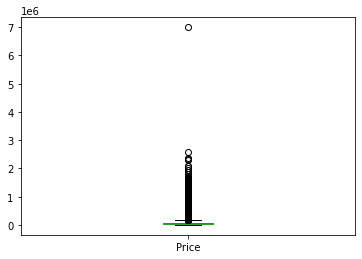

In [325]:
plot_boxplot(car_data_new,"Price")

In [326]:
#removing outliers

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [328]:
index_list = []
for price in ['Price']:
    index_list.extend(outliers(car_data_new,price))
index_list

[200,
 224,
 236,
 283,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 296,
 306,
 308,
 348,
 354,
 358,
 376,
 378,
 379,
 380,
 381,
 382,
 384,
 385,
 386,
 417,
 418,
 435,
 437,
 438,
 439,
 440,
 441,
 442,
 466,
 473,
 514,
 524,
 525,
 531,
 541,
 544,
 545,
 546,
 547,
 555,
 556,
 560,
 574,
 600,
 601,
 603,
 606,
 636,
 637,
 641,
 671,
 673,
 674,
 675,
 676,
 697,
 698,
 700,
 701,
 702,
 703,
 704,
 717,
 726,
 741,
 743,
 744,
 746,
 748,
 754,
 757,
 759,
 760,
 779,
 780,
 783,
 798,
 799,
 805,
 808,
 834,
 835,
 847,
 851,
 874,
 875,
 876,
 882,
 883,
 892,
 893,
 903,
 904,
 905,
 906,
 917,
 918,
 926,
 927,
 930,
 931,
 937,
 938,
 940,
 941,
 942,
 943,
 944,
 945,
 951,
 952,
 978,
 979,
 981,
 988,
 993,
 1007,
 1025,
 1026,
 1027,
 1030,
 1031,
 1032,
 1044,
 1045,
 1048,
 1050,
 1053,
 1060,
 1072,
 1074,
 1076,
 1078,
 1080,
 1084,
 1085,
 1095,
 1099,
 1100,
 1125,
 1126,
 1127,
 1128,
 1139,
 1154,
 1160,
 1168,
 1169,
 1171,
 1173,
 1174,

In [330]:
car_data_new.shape

(208304, 22)

In [329]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [331]:
car_data_new = remove(car_data_new,index_list)

In [332]:
car_data_new.shape

(191763, 22)

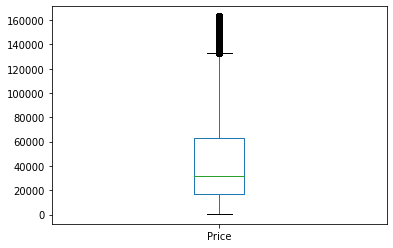

In [333]:
plot_boxplot(car_data_new,'Price')

***

- Handling the Production_year

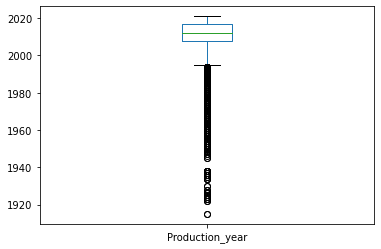

In [334]:
plot_boxplot(car_data_new,"Production_year")

In [339]:
index_list_proyear = []
for pro in ['Production_year']:
    index_list_proyear.extend(outliers(car_data_new,pro))
index_list_proyear

[1,
 416,
 767,
 1185,
 1402,
 1451,
 1471,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1586,
 1588,
 1590,
 1591,
 1592,
 1593,
 1594,
 1595,
 1596,
 1599,
 1601,
 1602,
 1604,
 1605,
 1608,
 1609,
 1611,
 1613,
 1615,
 1616,
 1617,
 1619,
 1620,
 1621,
 1622,
 1623,
 1624,
 1625,
 1626,
 1627,
 1628,
 1629,
 1630,
 1632,
 1633,
 1634,
 1635,
 1637,
 1639,
 1640,
 1641,
 1643,
 1644,
 11157,
 14533,
 14534,
 14539,
 14540,
 14541,
 14542,
 14543,
 14599,
 14600,
 14604,
 18274,
 18275,
 18276,
 18277,
 18278,
 18279,
 18280,
 18281,
 18283,
 18284,
 18285,
 18311,
 18324,
 18337,
 19087,
 19250,
 19272,
 19273,
 19350,
 19352,
 19354,
 19357,
 19360,
 19363,
 19364,
 19365,
 19366,
 19368,
 19370,
 21576,
 21646,
 21709,
 21763,
 22004,
 22023,
 22091,
 22098,
 22298,
 22482,
 22625,
 22714,
 22937,
 23032,
 23106

In [340]:
car_data_new = remove(car_data_new,index_list_proyear)

In [341]:
car_data_new.shape

(182370, 22)

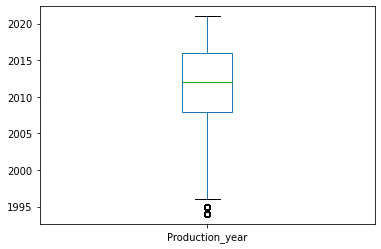

In [342]:
plot_boxplot(car_data_new,"Production_year")

***

- Handling the Mileage_km attribute

In [343]:
index_list_mileage_km = []
for mile in ['Mileage_km']:
    index_list_mileage_km.extend(outliers(car_data_new,mile))
index_list_mileage_km

[261,
 507,
 1607,
 3083,
 3500,
 4555,
 4574,
 4577,
 4620,
 4672,
 4863,
 4908,
 5486,
 5503,
 5826,
 5892,
 6135,
 6529,
 6712,
 7099,
 7142,
 7212,
 7428,
 7535,
 7649,
 7666,
 7819,
 8324,
 8450,
 8492,
 8825,
 8837,
 8909,
 8920,
 9185,
 9811,
 10006,
 10075,
 10175,
 10238,
 10289,
 10300,
 10361,
 10365,
 10369,
 10376,
 10396,
 10454,
 10462,
 10604,
 10622,
 10732,
 10744,
 10902,
 10945,
 10987,
 11226,
 11245,
 11294,
 11381,
 11439,
 11540,
 11659,
 11737,
 11768,
 11875,
 11962,
 12000,
 12045,
 12104,
 12158,
 12216,
 12268,
 12358,
 12442,
 12597,
 12643,
 12724,
 12735,
 12787,
 12930,
 13112,
 13261,
 13292,
 13462,
 13481,
 13976,
 14096,
 14128,
 14144,
 14180,
 14209,
 14215,
 14247,
 14275,
 14286,
 14303,
 14354,
 14388,
 14418,
 14443,
 14477,
 16572,
 16668,
 16703,
 16748,
 16948,
 17310,
 17791,
 18282,
 19053,
 19489,
 20161,
 22519,
 22524,
 22832,
 22901,
 22995,
 23226,
 23333,
 23343,
 23544,
 24080,
 24110,
 24221,
 24286,
 24392,
 24924,
 25006,
 25084

In [344]:
car_data_new = remove(car_data_new,index_list_mileage_km)

In [345]:
car_data_new.shape

(181502, 22)

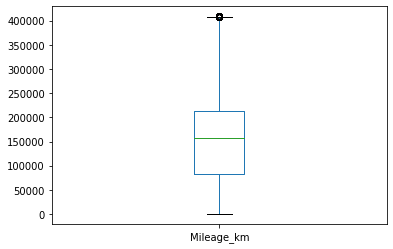

In [346]:
plot_boxplot(car_data_new,"Mileage_km")

***

- Handling Power_HP attribute

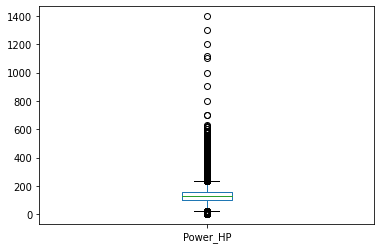

In [348]:
plot_boxplot(car_data_new,"Power_HP")

In [350]:
index_list_POWER_HP = []
for power in ['Power_HP']:
    index_list_POWER_HP.extend(outliers(car_data_new,power))
index_list_POWER_HP

[10,
 57,
 59,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 198,
 199,
 207,
 208,
 213,
 217,
 228,
 267,
 298,
 365,
 375,
 389,
 450,
 454,
 468,
 477,
 489,
 494,
 513,
 519,
 520,
 522,
 548,
 615,
 647,
 683,
 685,
 693,
 699,
 714,
 720,
 736,
 785,
 787,
 794,
 812,
 897,
 901,
 92

In [351]:
car_data_new = remove(car_data_new,index_list_POWER_HP)

In [352]:
car_data_new.shape

(169425, 22)

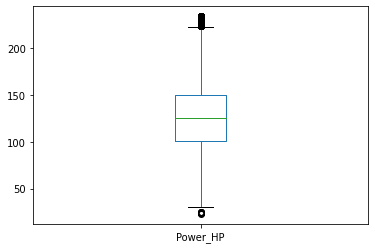

In [353]:
plot_boxplot(car_data_new,"Power_HP")

***

Handling Displacement_cm3 attribute

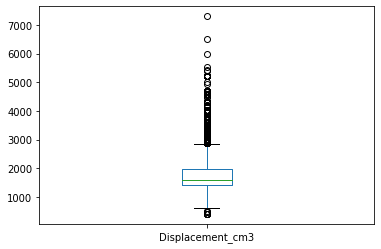

In [354]:
plot_boxplot(car_data_new,"Displacement_cm3")

In [355]:
index_list_dis = []
for dis in ['Displacement_cm3']:
    index_list_dis.extend(outliers(car_data_new,dis))
index_list_dis

[61,
 160,
 167,
 196,
 201,
 237,
 490,
 573,
 4446,
 4463,
 4517,
 4576,
 4630,
 4636,
 4656,
 4660,
 4671,
 4809,
 4869,
 5055,
 5075,
 5119,
 5132,
 5154,
 5158,
 5164,
 5259,
 5289,
 5315,
 5352,
 5354,
 5363,
 5459,
 5488,
 5502,
 5550,
 5593,
 5623,
 5708,
 5767,
 5777,
 5815,
 5908,
 6008,
 6014,
 6019,
 6078,
 6089,
 6100,
 6102,
 6104,
 6241,
 6249,
 6313,
 6362,
 6459,
 6481,
 6519,
 6672,
 6678,
 6700,
 6709,
 6714,
 6749,
 6755,
 6760,
 6879,
 6946,
 7118,
 7184,
 7272,
 7294,
 7357,
 7413,
 7422,
 7446,
 7499,
 7615,
 7629,
 7636,
 7720,
 7744,
 7802,
 7887,
 7939,
 8206,
 8218,
 8227,
 8228,
 8236,
 8284,
 8316,
 8402,
 8525,
 8527,
 8543,
 8565,
 8656,
 8667,
 8673,
 8745,
 8765,
 8842,
 8872,
 8886,
 8928,
 8976,
 9011,
 9046,
 9074,
 9095,
 9271,
 9294,
 9367,
 9435,
 9507,
 9575,
 9598,
 9612,
 9689,
 9690,
 9727,
 9734,
 9748,
 9776,
 9802,
 9890,
 9946,
 9956,
 9958,
 9970,
 9971,
 9972,
 9973,
 9977,
 9985,
 9991,
 10002,
 10005,
 10007,
 10014,
 10019,
 10021,
 1

In [356]:
car_data_new = remove(car_data_new,index_list_dis)

In [357]:
car_data_new.shape

(165743, 22)

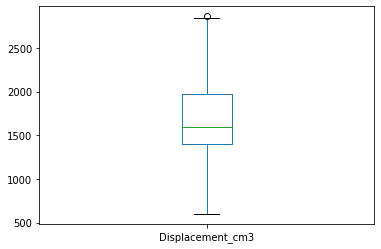

In [358]:
plot_boxplot(car_data_new,"Displacement_cm3")

***


- Handling CO2_emissions

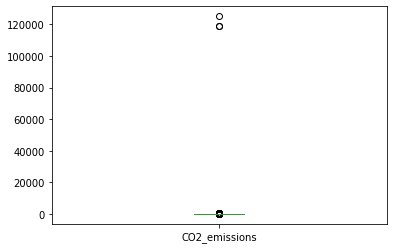

In [362]:
plot_boxplot(car_data_new,"CO2_emissions")

In [363]:
index_list_CO2 = []
for CO2 in ['CO2_emissions']:
    index_list_CO2.extend(outliers(car_data_new,CO2))
index_list_CO2

[18,
 20,
 32,
 36,
 47,
 205,
 206,
 209,
 210,
 212,
 215,
 218,
 222,
 225,
 229,
 230,
 231,
 234,
 238,
 242,
 244,
 246,
 255,
 258,
 259,
 268,
 271,
 273,
 277,
 279,
 300,
 305,
 310,
 311,
 312,
 315,
 317,
 318,
 319,
 322,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 334,
 335,
 336,
 337,
 343,
 350,
 352,
 360,
 361,
 362,
 363,
 364,
 366,
 367,
 369,
 370,
 372,
 373,
 383,
 387,
 392,
 394,
 396,
 403,
 406,
 407,
 408,
 410,
 411,
 413,
 415,
 419,
 421,
 422,
 424,
 425,
 427,
 431,
 432,
 445,
 448,
 449,
 456,
 457,
 459,
 464,
 465,
 471,
 474,
 475,
 476,
 479,
 481,
 482,
 483,
 484,
 487,
 491,
 492,
 493,
 495,
 498,
 499,
 501,
 503,
 504,
 505,
 506,
 517,
 518,
 521,
 526,
 527,
 529,
 530,
 532,
 533,
 537,
 538,
 539,
 540,
 542,
 551,
 552,
 554,
 557,
 563,
 564,
 565,
 567,
 579,
 580,
 581,
 582,
 585,
 586,
 588,
 591,
 593,
 598,
 599,
 602,
 604,
 605,
 607,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 624,
 625,
 627,
 629,
 630,
 631,
 642,
 64

In [364]:
car_data_new = remove(car_data_new,index_list_CO2)

In [365]:
car_data_new.shape

(93852, 22)

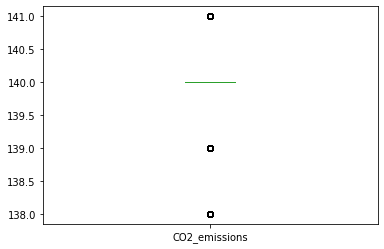

In [374]:
plot_boxplot(car_data_new,"CO2_emissions")

***

- Handling Doors_number attribute

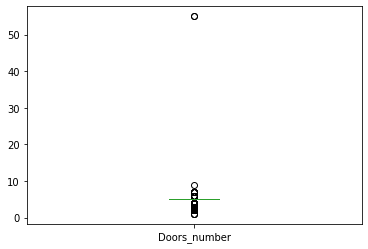

In [368]:
plot_boxplot(car_data_new,"Doors_number")

In [369]:
index_list_doors = []
for doors in ['Doors_number']:
    index_list_doors.extend(outliers(car_data_new,doors))
index_list_doors

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 197,
 204,
 211,
 214,
 216,
 221,
 223,
 233,
 235,
 240,
 243,
 247,
 249,
 250,
 251,
 252,
 253,
 256,
 260,
 270,
 272,
 275,
 284,
 297,
 299,
 302,
 304,
 307,
 309,
 313,
 316,
 320,
 323,
 324,
 338,
 341,
 344,
 347,
 355,
 357,
 359,
 371,
 374,
 388,
 393,
 395,
 397,
 399,
 400,
 401,
 402,
 405,
 414,
 420,
 423,
 426,
 428,
 429,
 430,
 433,
 444,
 451,
 452,
 455,
 458,
 460,
 462,
 467,
 469,
 470,
 472,
 478,
 480,
 496,
 509,
 510,
 516,
 523,
 535,
 536,
 543,
 549,
 550,
 558,
 559,
 562,
 566,
 570,
 576,
 578,
 587,
 590,
 592,
 594,
 597,
 609,
 610,
 611,
 612,
 623,
 628,
 632,
 633,
 634,
 635,
 638,
 644,
 649,
 650,
 651,
 660,
 662,
 666,
 678,
 679,
 681,
 682,
 692,
 694,
 696,
 706,
 708,
 710,
 711,
 715,
 716,
 72

In [371]:
car_data_new = remove(car_data_new,index_list_doors)

In [372]:
car_data_new.shape

(74386, 22)

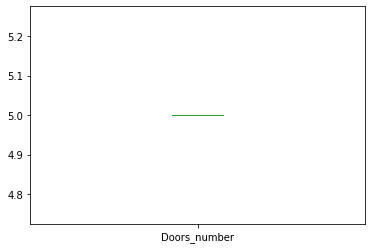

In [375]:
plot_boxplot(car_data_new,"Doors_number")

***

# Research Questions and visualization